In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
afmdata = np.genfromtxt('../NaRWHAL/Data/BackgroundedTXTFiles/500umNetwork-SubstrateArea')
afmdata= afmdata*(10**9)
height, width = afmdata.shape
afmimg=np.zeros((height, width, 3))

In [18]:
factor=(255)/(afmdata.max()-afmdata.min())
for i in range(height):
    for j in range(width):
        intensity=np.int((afmdata[i][j]-afmdata.min())*factor)
        #afmimg[i][j]=np.array([np.int((afmdata[i][j]-afmdata.min())*factor),0,0])
        afmimg[i][j]=np.array([intensity, intensity, intensity])

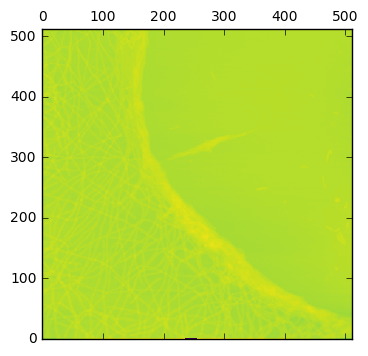

In [19]:
afmimg = np.uint8(afmimg)
grayscaled = cv2.cvtColor(afmimg,cv2.COLOR_BGR2GRAY)
plt.matshow(grayscaled, origin = 'lower', cmap = 'viridis')

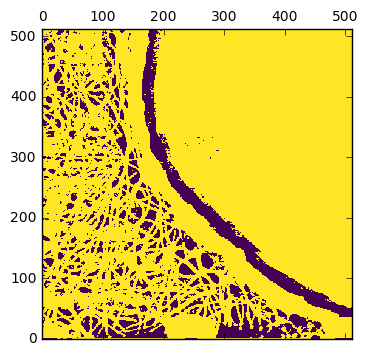

In [20]:
background = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 71, 3)
plt.matshow(background, origin = 'lower', cmap = 'viridis')

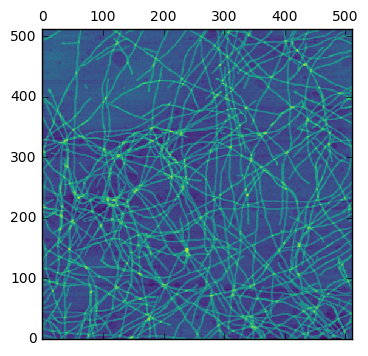

In [14]:
backgrounded = grayscaled - background
plt.matshow(backgrounded, origin = 'lower', cmap = 'viridis')

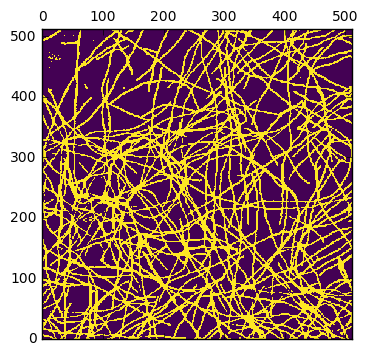

In [15]:
retval2,threshold2 = cv2.threshold(backgrounded, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.matshow(threshold2, origin = 'lower', cmap = "viridis")

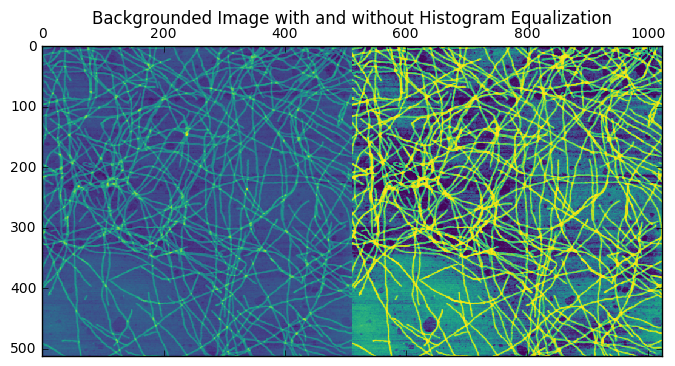

In [16]:
img = backgrounded
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.matshow(res, cmap = 'viridis')
plt.title('Backgrounded Image with and without Histogram Equalization')

In [26]:
def histogram_equalization(source):
    """
    Takes in a uint8 image and equalizes the histogram
    """
    img = source
    equ = cv2.equalizeHist(img)
    
    return equ

In [27]:
test1 = histogram_equalization(backgrounded)

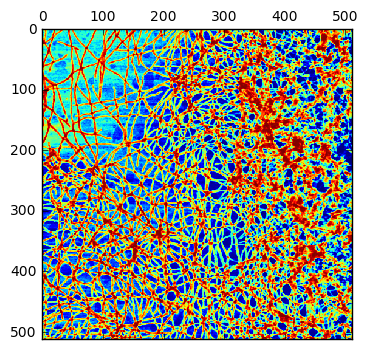

In [28]:
plt.matshow(test1)